In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/crowd people'

/content/drive/MyDrive/Colab Notebooks/crowd people


In [2]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 12761, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 12761 (delta 40), reused 56 (delta 20), pack-reused 12661
Receiving objects: 100% (12761/12761), 7.54 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (8586/8586), done.
Updating files: 100% (419/419), done.


# Importing Libs

In [3]:
import numpy as np
import pandas as pd
from glob import glob
import shutil
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns
import cv2
from os.path import isfile, join
from IPython.display import Image, clear_output
import subprocess
import torch

In [4]:
!unzip frames

Archive:  frames.zip
   creating: frames/
  inflating: frames/seq_000399.jpg   
  inflating: frames/seq_000372.jpg   
  inflating: frames/seq_000184.jpg   
  inflating: frames/seq_000321.jpg   
  inflating: frames/seq_000294.jpg   
  inflating: frames/seq_000176.jpg   
  inflating: frames/seq_000133.jpg   
  inflating: frames/seq_000313.jpg   
  inflating: frames/seq_000015.jpg   
  inflating: frames/seq_000168.jpg   
  inflating: frames/seq_000125.jpg   
  inflating: frames/seq_000200.jpg   
  inflating: frames/seq_000235.jpg   
  inflating: frames/seq_000305.jpg   
  inflating: frames/seq_000117.jpg   
  inflating: frames/seq_000227.jpg   
  inflating: frames/seq_000040.jpg   
  inflating: frames/seq_000150.jpg   
  inflating: frames/seq_000032.jpg   
  inflating: frames/seq_000373.jpg   
  inflating: frames/seq_000142.jpg   
  inflating: frames/seq_000067.jpg   
  inflating: frames/seq_000059.jpg   
  inflating: frames/seq_000314.jpg   
  inflating: frames/seq_000016.jpg   
  inflat

In [5]:
tpath0 = 'frames/'

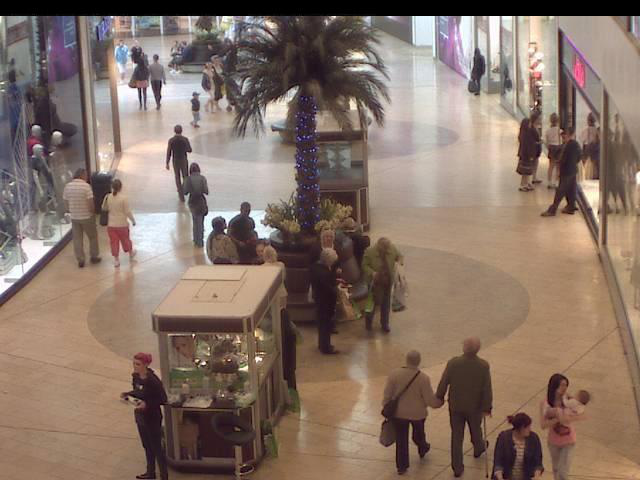

In [7]:
from PIL import Image
Image.open('frames/seq_000001.jpg')

#YOLO v8

In [8]:
clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0)
 if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


# Weight Yolo V8n.pt

In [9]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.5/78.2 GB disk)


In [11]:
!yolo task=detect mode=predict model=yolov8x.pt imgsz=640 conf=0.05 source=frames save_txt=True save_conf=True

YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients

image 1/2000 /content/drive/My Drive/Colab Notebooks/crowd people/frames/seq_000001.jpg: 480x640 28 persons, 1 car, 1 truck, 1 backpack, 10 handbags, 1 suitcase, 4 potted plants, 107.9ms
image 2/2000 /content/drive/My Drive/Colab Notebooks/crowd people/frames/seq_000002.jpg: 480x640 33 persons, 2 bicycles, 23 handbags, 3 suitcases, 1 potted plant, 40.7ms
image 3/2000 /content/drive/My Drive/Colab Notebooks/crowd people/frames/seq_000003.jpg: 480x640 30 persons, 1 truck, 13 handbags, 1 suitcase, 2 potted plants, 41.7ms
image 4/2000 /content/drive/My Drive/Colab Notebooks/crowd people/frames/seq_000004.jpg: 480x640 32 persons, 3 backpacks, 16 handbags, 2 suitcases, 2 potted plants, 41.0ms
image 5/2000 /content/drive/My Drive/Colab Notebooks/crowd people/frames/seq_000005.jpg: 480x640 27 persons, 1 truck, 3 backpacks, 11 handbags, 4 suitcases, 3 potted plants, 41.7ms
image 6/2000 /content/drive/My Drive/Colab Notebooks

In [37]:
txt_dir = 'runs/detect/predict2/labels'
txtpaths = []
texts = sorted(os.listdir(txt_dir))

count = 0
res = []

for i in range(0,2000):
  count = 0
  for j in range(0,len(np.loadtxt(os.path.join(txt_dir,texts[i])))):
    if (np.loadtxt(os.path.join(txt_dir,texts[i]))[j][0] == 0.0):
      count += 1
  res.append(count)



KeyboardInterrupt: ignored

In [39]:
print(texts)

['seq_000001.txt', 'seq_000002.txt', 'seq_000003.txt', 'seq_000004.txt', 'seq_000005.txt', 'seq_000006.txt', 'seq_000007.txt', 'seq_000008.txt', 'seq_000009.txt', 'seq_000010.txt', 'seq_000011.txt', 'seq_000012.txt', 'seq_000013.txt', 'seq_000014.txt', 'seq_000015.txt', 'seq_000016.txt', 'seq_000017.txt', 'seq_000018.txt', 'seq_000019.txt', 'seq_000020.txt', 'seq_000021.txt', 'seq_000022.txt', 'seq_000023.txt', 'seq_000024.txt', 'seq_000025.txt', 'seq_000026.txt', 'seq_000027.txt', 'seq_000028.txt', 'seq_000029.txt', 'seq_000030.txt', 'seq_000031.txt', 'seq_000032.txt', 'seq_000033.txt', 'seq_000034.txt', 'seq_000035.txt', 'seq_000036.txt', 'seq_000037.txt', 'seq_000038.txt', 'seq_000039.txt', 'seq_000040.txt', 'seq_000041.txt', 'seq_000042.txt', 'seq_000043.txt', 'seq_000044.txt', 'seq_000045.txt', 'seq_000046.txt', 'seq_000047.txt', 'seq_000048.txt', 'seq_000049.txt', 'seq_000050.txt', 'seq_000051.txt', 'seq_000052.txt', 'seq_000053.txt', 'seq_000054.txt', 'seq_000055.txt', 'seq_0000

In [13]:
res

[28,
 33,
 30,
 32,
 27,
 30,
 34,
 33,
 24,
 28,
 18,
 25,
 22,
 22,
 21,
 18,
 14,
 20,
 29,
 27,
 29,
 21,
 26,
 26,
 23,
 25,
 24,
 21,
 23,
 22,
 19,
 16,
 18,
 22,
 21,
 19,
 29,
 26,
 27,
 25,
 21,
 18,
 16,
 20,
 21,
 22,
 25,
 22,
 35,
 29,
 23,
 19,
 19,
 18,
 19,
 25,
 19,
 23,
 18,
 11,
 13,
 12,
 24,
 18,
 23,
 23,
 25,
 27,
 25,
 26,
 26,
 27,
 22,
 23,
 34,
 28,
 22,
 25,
 28,
 26,
 27,
 29,
 36,
 30,
 25,
 26,
 33,
 27,
 26,
 26,
 22,
 26,
 25,
 28,
 27,
 21,
 23,
 25,
 28,
 22,
 22,
 20,
 18,
 17,
 20,
 17,
 21,
 28,
 22,
 20,
 18,
 26,
 28,
 29,
 28,
 31,
 33,
 31,
 33,
 33,
 31,
 26,
 28,
 30,
 21,
 25,
 24,
 26,
 31,
 38,
 34,
 29,
 29,
 27,
 28,
 30,
 26,
 29,
 28,
 27,
 26,
 25,
 25,
 28,
 35,
 32,
 26,
 24,
 28,
 28,
 22,
 25,
 26,
 26,
 23,
 26,
 21,
 33,
 27,
 26,
 27,
 29,
 26,
 25,
 22,
 31,
 32,
 28,
 31,
 26,
 25,
 20,
 21,
 21,
 35,
 34,
 27,
 34,
 32,
 31,
 35,
 33,
 30,
 35,
 27,
 28,
 27,
 29,
 29,
 27,
 27,
 24,
 24,
 28,
 25,
 28,
 28,
 28,
 28,
 28,


In [15]:
org = list(pd.read_csv('labels.csv')['count'])[0:2000]

In [16]:
diff = [a - b for a,b in zip(org, res)]

<Figure size 1000x1000 with 0 Axes>

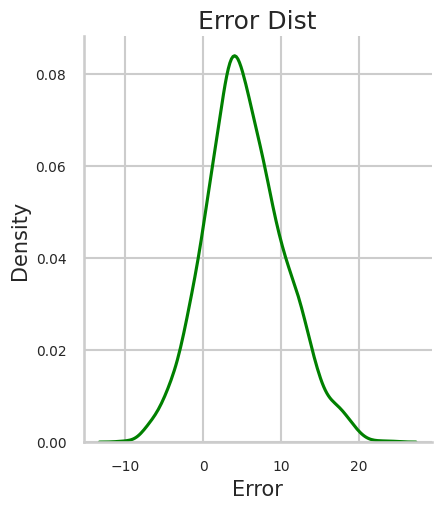

In [18]:
plt.figure(figsize = (10,10))
sns.set_style('whitegrid')
sns.set_context("talk")
sns.displot(diff, kind = 'kde', color = 'green')
plt.title("Error Dist", fontsize = 18)
plt.xlabel("Error", fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [19]:
mae = np.mean(np.abs(np.array(res) - np.array(org)))

In [20]:
mae

6.0035

In [29]:
mse = np.mean(np.square(np.array(res) - np.array(org)))

In [30]:
mse

54.5505

54.5505


# Visualization

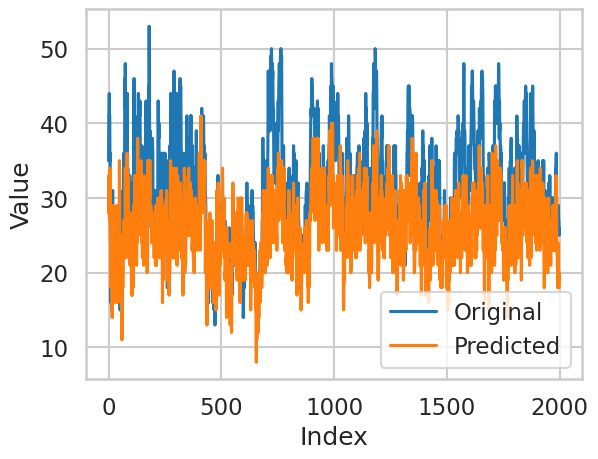

In [31]:
import matplotlib.pyplot as plt

# Create x-axis values
x = range(len(org))

# Create the plot
plt.plot(x, org, label='Original')
plt.plot(x, res, label='Predicted')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()

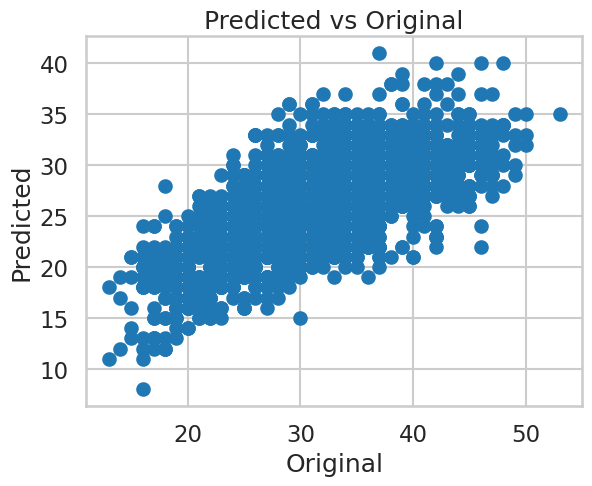

In [32]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(org, res)

# Add labels and title
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Predicted vs Original')

# Show the plot
plt.show()

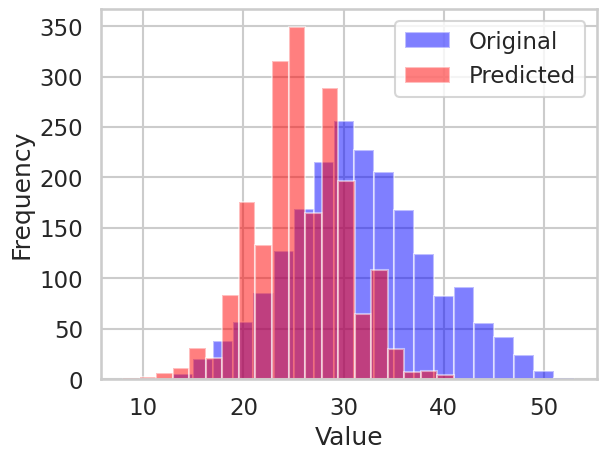

In [33]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(org, bins=20, color='blue', alpha=0.5, label='Original')
plt.hist(res, bins=20, color='red', alpha=0.5, label='Predicted')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [45]:
!ls

Crowd-People.ipynb  frames.zip	runs	     yolov8x.pt
frames		    labels.csv	ultralytics


In [46]:
%cd '/content/drive/MyDrive/Colab Notebooks/crowd people/runs/detect/predict2/labels'

/content/drive/MyDrive/Colab Notebooks/crowd people/runs/detect/predict2/labels


In [49]:
boxdata=[]
boxfile=[]
#print(texts)
for i in range(len(texts)):
    file=texts[i]
    boxdata+=[np.loadtxt(file)]
    boxfile+=[file[0:-4].split('/')[-1]]
print(boxdata[0:6])
print(boxfile[0:6])


[array([[          0,     0.72449,     0.84756,     0.09529,     0.29577,     0.88685],
       [          0,     0.22575,     0.86648,    0.076521,      0.2666,     0.87602],
       [          0,     0.80874,     0.92907,    0.084044,     0.14089,     0.86516],
       [          0,     0.88398,     0.88828,    0.079308,     0.22227,     0.85712],
       [          0,      0.1289,     0.45323,    0.062162,     0.21167,     0.81579],
       [          0,     0.64441,     0.85902,    0.099625,     0.26184,     0.76763],
       [          0,     0.87681,     0.35801,    0.065237,     0.18862,     0.74682],
       [          0,     0.30589,     0.42705,    0.041842,     0.17917,     0.74532],
       [          0,     0.18563,      0.4654,    0.057235,     0.18647,     0.70798],
       [          0,     0.27947,     0.34015,    0.041967,     0.16199,     0.69063],
       [         26,     0.62665,     0.82191,    0.061977,    0.097847,     0.64557],
       [          0,     0.59771,     0.59

In [71]:
BOX=pd.DataFrame()

for i in range(len(boxdata)):
    if type(boxdata[i][0])==np.float64:
        add=pd.DataFrame([boxdata[i]])
        add[6]=boxfile[i]
        BOX=pd.concat([BOX,add])
    else:
        add=pd.DataFrame(boxdata[i])
        add[6]=boxfile[i]
        #display(add)
        BOX=pd.concat([BOX,add])

BOX2=BOX.reset_index(drop=True)
BOX2[0:10]

,0,1,2,3,4,5,6
0,0.0,0.724487,0.847557,0.095290,0.295772,0.886851,seq_000001
1,0.0,0.225748,0.866481,0.076521,0.266596,0.876023,seq_000001
2,0.0,0.808736,0.929066,0.084044,0.140891,0.865162,seq_000001
3,0.0,0.883979,0.888281,0.079308,0.222270,0.857123,seq_000001
4,0.0,0.128902,0.453230,0.062162,0.211669,0.815786,seq_000001
5,0.0,0.644408,0.859018,0.099625,0.261836,0.767629,seq_000001
6,0.0,0.876814,0.358008,0.065237,0.188620,0.746819,seq_000001
7,0.0,0.305894,0.427048,0.041842,0.179168,0.745319,seq_000001
8,0.0,0.185627,0.465403,0.057235,0.186474,0.707976,seq_000001
9,0.0,0.279474,0.340152,0.041967,0.161987,0.690635,seq_000001


In [72]:
BOX2.columns=['class','x','y','w','h','confidence','file']
BOX2['order']=BOX2['file'].apply(lambda x:('0000'+x.split('_')[-1])[-4:])
#BOX2['time']=BOX2['order'].apply(lambda x:int(x)*30/750)
data0=BOX2.sort_values('order',ascending=True)
display(data0)

,class,x,y,w,h,confidence,file,order
0,0.0,0.724487,0.847557,0.095290,0.295772,0.886851,seq_000001,0001
25,0.0,0.921764,0.305115,0.030302,0.140898,0.129942,seq_000001,0001
26,26.0,0.163969,0.437195,0.016571,0.068197,0.128458,seq_000001,0001
27,0.0,0.065523,0.343357,0.046982,0.165260,0.125677,seq_000001,0001
28,26.0,0.163830,0.449352,0.016071,0.044519,0.118974,seq_000001,0001
...,...,...,...,...,...,...,...,...
89252,0.0,0.381817,0.508271,0.059857,0.090283,0.436863,seq_002000,2000
89253,0.0,0.656273,0.215172,0.035781,0.114181,0.431207,seq_002000,2000
89254,28.0,0.146903,0.401761,0.064426,0.091273,0.342807,seq_002000,2000
89256,0.0,0.060762,0.340082,0.039022,0.162094,0.285157,seq_002000,2000


In [73]:
CLASSES = [
"person", "bicycle", "car", "motorcycle", "airplane",
"bus", "train", "truck", "boat", "traffic light",
"fire hydrant", "stop sign", "parking meter", "bench",
"bird", "cat", "dog", "horse", "sheep", "cow",
"elephant", "bear", "zebra", "giraffe", "backpack",
"umbrella", "handbag", "tie", "suitcase", "frisbee",
"skis", "snowboard", "sports ball", "kite", "baseball bat",
"baseball glove", "skateboard", "surfboard",
"tennis racket", "bottle", "wine glass", "cup", "fork",
"knife", "spoon", "bowl", "banana", "apple",
"sandwich", "orange", "broccoli", "car|rot", "hot dog",
"pizza", "donut", "cake", "chair", "couch",
"potted plant", "bed", "dining table", "toilet", "tv",
"laptop", "mouse", "remote", "keyboard",
"cell phone", "microwave", "oven", "toaster", "sink",
"refrigerator", "book", "clock", "vase", "scissors",
"teddy bear", "hair drier", "toothbrush"]

In [74]:
data0['class'].value_counts()

0.0     51600
26.0    20429
28.0     5599
58.0     5005
13.0     3118
24.0     1709
7.0       630
56.0      298
27.0      157
1.0       139
6.0       111
60.0       98
34.0       64
25.0       64
2.0        60
5.0        57
36.0       26
57.0       21
62.0       20
3.0        10
16.0       10
12.0        8
17.0        8
73.0        7
67.0        6
39.0        5
38.0        5
37.0        3
20.0        2
32.0        2
35.0        2
8.0         1
41.0        1
Name: class, dtype: int64

In [75]:
for i in range(len(CLASSES)):
    if CLASSES[i]=="person":
        person_num=i
        break
print(person_num)

0


In [76]:
print(len(data0[data0['class']==person_num]))


51600


In [77]:
data0=data0[data0['confidence']>0.001][data0['class']==0]
data0=data0.reset_index(drop=True)
display(data0)

,class,x,y,w,h,confidence,file,order
0,0.0,0.724487,0.847557,0.095290,0.295772,0.886851,seq_000001,0001
1,0.0,0.921764,0.305115,0.030302,0.140898,0.129942,seq_000001,0001
2,0.0,0.065523,0.343357,0.046982,0.165260,0.125677,seq_000001,0001
3,0.0,0.218865,0.171706,0.031423,0.116368,0.141726,seq_000001,0001
4,0.0,0.380990,0.484080,0.052319,0.129036,0.077657,seq_000001,0001
...,...,...,...,...,...,...,...,...
51595,0.0,0.223547,0.237826,0.023627,0.160996,0.449960,seq_002000,2000
51596,0.0,0.381817,0.508271,0.059857,0.090283,0.436863,seq_002000,2000
51597,0.0,0.656273,0.215172,0.035781,0.114181,0.431207,seq_002000,2000
51598,0.0,0.060762,0.340082,0.039022,0.162094,0.285157,seq_002000,2000


In [78]:
data1=data0[['order']].copy()
data1['count']=1
data2=data1.groupby('order',as_index=False).sum()
display(data2)

,order,count
0,0001,28
1,0002,33
2,0003,30
3,0004,32
4,0005,27
...,...,...
1995,1996,19
1996,1997,18
1997,1998,20
1998,1999,19


In [79]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [80]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data2['order'],y=data2['count'],name='person'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="Number of people detected")
fig.update_xaxes(title_text="order")
fig.update_yaxes(title_text="People Number",secondary_y=False)
fig.show()

In [89]:
image_dir='/content/drive/MyDrive/Colab Notebooks/crowd people/frames'
def view(order):
    file='seq_00'+order+'.jpg'
    path=os.path.join(image_dir,file)
    img=cv2.imread(path)
    plt.figure(figsize=(12,18))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

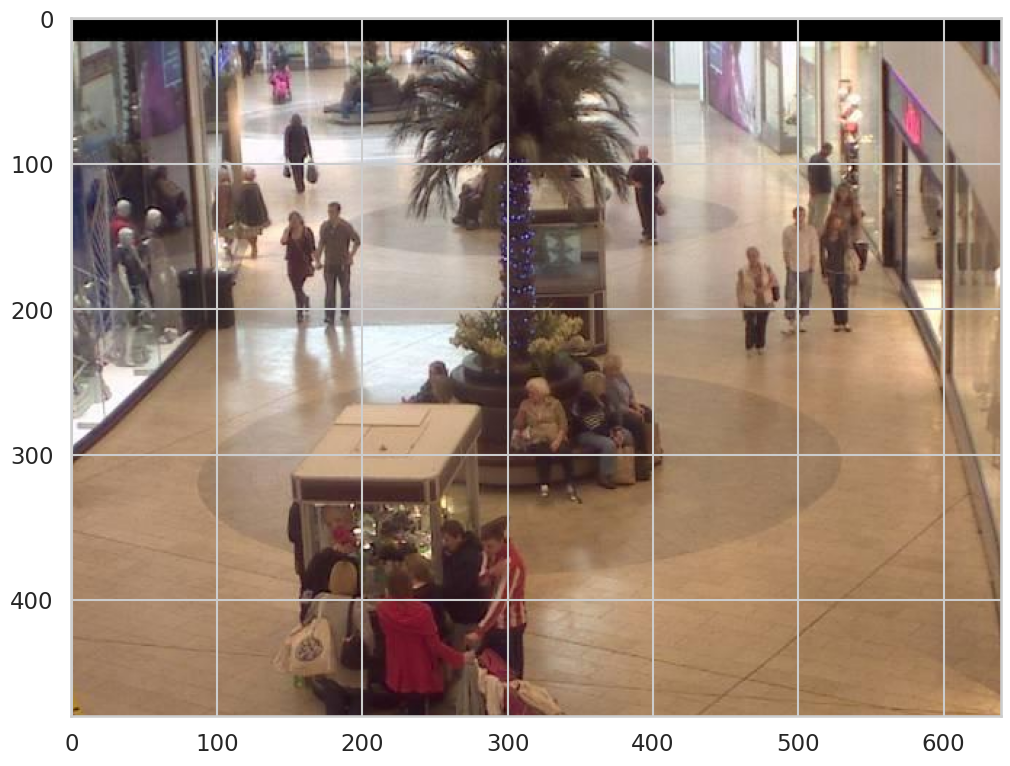

In [90]:
view('0156')

In [92]:
pred_dir = '/content/drive/MyDrive/Colab Notebooks/crowd people/runs/detect/predict2'
def view_pred(order):
    file='seq_00'+order+'.jpg'
    path=os.path.join(pred_dir,file)
    img=cv2.imread(path)
    plt.figure(figsize=(12,18))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

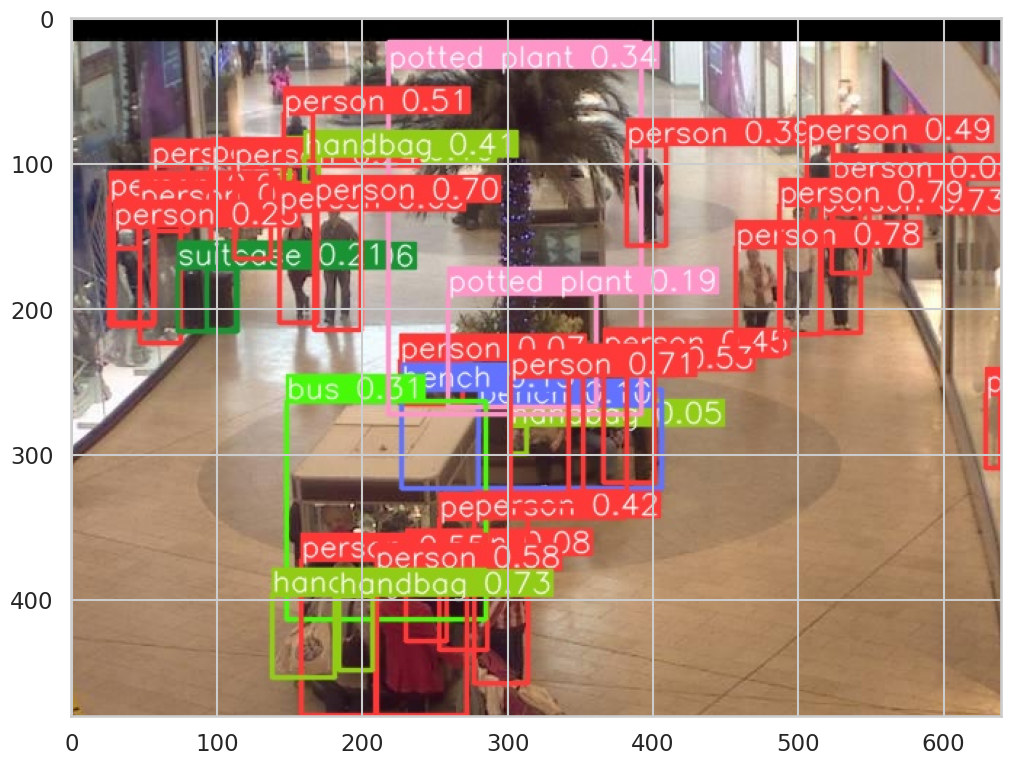

In [93]:
view_pred('0156')